# Objective: 

borrowers who default cause the largest amount of loss to the lenders. 
In this case, the customers labelled as 'charged-off' are the 'defaulters'

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
Identification of such applicants using EDA is the aim of this case study.

# Results Expected
- Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
- Present the overall approach of the analysis in a presentation: 
- Mention the problem statement and the analysis approach briefly 
- Explain the results of univariate, bivariate analysis etc. in business terms
- Include visualisations and summarise the most important results in the presentation
 

You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. 

 

`Important Note: Please make sure to rename your Python notebook "Group_Facilitator_Name.ipynb". `

 

 You need to submit a GitHub repository link that contains the files above . You need to write a README.md for the GitHub repository.  You can follow the video below to understand how to create the GitHub repository. Make sure your GitHub link is public. 

## <font color=blue> Lets understand more on the objective </font>
- We need to figure out for any new customers what are the parameters that will decide the customer will likely to be a defaulter
- So for this we need to analyze the columns that take part while applying the loan by the customer, i.e the columns we already new beforehand
- On the other hand the fields that provides information about the existing loans and behavior may not be quite helpful
- We shall analyze each columns for our decision making
- Insights shall be deduced along with supported graphs
- Overall Obseravions shall be shared with derived suggestions for analyzing the objective
- Suggestions shall be mentioned, what parameters shall decide a defaulter
- Insights shall be provide on which new customer is likely to fully pay the loan

### <font color=blue> High level actions to be taken for the analysis </font>

- Loading the data set
- Cleaning the data by following the suggested standard procedures and techniques
- Univariate Analysis
- Bivariate and multivariate Analysis

###  Importing all the required Libraries for EDA 

In [199]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [200]:
## Formatting the view of jupyter notebook

# Setting the maximum rows to 20
pd.set_option('display.max_rows', 200)

# Setting the maximum columns as per the data dictionary, able to view all the avaialable columns for analysis
pd.set_option('display.max_columns', 120)

pd.set_option('display.width', 1000)

# 1. Data Sourcing

### Loading the loan csv file

In [201]:
## Loading the loan.csv dataset
## Reading the csv data set and store it into a dataframe


loan_df = pd.read_csv('loan.csv') # The csv file should be in the same directory as that of python notebook
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Viewing the basic statistics of the dataset

In [202]:
# Check the number of rows and columns 
print(loan_df.shape)

## Result : the data set consists of 39717 rows and 111 columns

(39717, 111)


## <font color=blue> Insight </font>
- Data set has - 39717 rows
- and 111 columns

### To view the full list of column

In [203]:
### using the option verbose=True in info() method
print(loan_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [204]:
## Observing the statisics using describe
loan_df.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## <font color=blue> Insight </font>
- the data set consists of 39717 rows and 111 columns
- The data types consists a combination of both Object and numeric

# 2. Data Cleaning

### In this section will be cleaning the data set by applying the following approaches
- 2.1 Fixing Missing Values
- 2.2 Fix Rows and columns
- 2.3 Standardise Values
- 2.4 Fix invalid values
- 2.5 Filter data

## 2.1 : Fixing Missing Values

In [205]:
## Getting the count of null values in each column
loan_df.isnull().sum().sort_values(ascending=False)


verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


## <font color=blue> Insight </font>
- There are columns which consists of all null values. 
- We can drop these columns
- As these columnms will not contribute anything in our analysis

## Fixing Missing Values : Dropping the list of fields having all values as null

In [206]:

print(f'shape of dataframe before dropping columns {loan_df.shape}')
loan_df=loan_df.dropna(axis=1, how='all')
print(f'shape of dataframe after dropping columns {loan_df.shape}')


shape of dataframe before dropping columns (39717, 111)
shape of dataframe after dropping columns (39717, 57)


## <font color=blue> Insight </font>
- Nearly <font color=brown><b> 54 </b></font> columns have been dropped as all these column values are null
- As these columns have null values these can easily be dropped 
- And these fields will have no impact in the analysis

## Lets analyze all the fields having higher percentage of null values

## 2.2 Fix Rows and columns

### Fixing Rows

### 2.2.a Delete incorrect Rows : Unnecessary header and Footer rows

In [207]:
## Fetching the head and tail of the records to view any unnecessary data is present

loan_df.head()
loan_df.tail()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolidation Loan,027xx,MA,14.29,1,Oct-03,0,11.0,0.0,7,0,4175,51.50%,8,f,0.0,0.0,9195.263334,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


## <font color=blue> Insight </font>
- Header & Footer rows are fine. Nothing to remove

### 2.2.b Delete summary rows if any

## <font color=blue> Insight </font>
- No such summary rows to be deleted. Few of the rows marked as total* will be used for analysis 

### 2.2.c Delete Extra rows: Detecting column number indicator, blank rows etc

In [208]:

## Dropping rows which have all null values
print(f'shape of dataframe before dropping rows {loan_df.shape}')
loan_df.dropna(axis='index', how='all', inplace=True)
print(f'shape of dataframe after dropping rows {loan_df.shape}')


shape of dataframe before dropping rows (39717, 57)
shape of dataframe after dropping rows (39717, 57)


## <font color=blue> Insight </font>
- <font color=brown><b> 0 </b></font> rows has been deleted
- There are no rows having all null values
- No rows deleted

## Fixing Columns

### 2.2.d : Add column name if missing

## <font color=blue> Insight </font>
- All Columns have proper column header
- There is no extra column as column indicator

### 2.2.e : Rename Columns for Abbrevations and encoded columns

## <font color=blue> Insight </font>
- As of now the header names looks good and do not contain any abbreviated oe encoded columns


### 2.2.f : Delete unnecessary columns 

### Dropping list of customer behavior columns
`These customer behavior columns will not help in analysis of defaulter for any new customers`<br>
<br>
<br>
Listing some of the columns
- next_pymnt_d
- mths_since_last_record
- mths_since_last_delinq
- desc
- delinq_2yrs
- earliest_cr_line
- inq_last_6mths
- open_acc
- pub_rec
- revol_bal
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d
- application_type

In [209]:
## Dropping the above list of columns

column_list = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc', 'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']
print(f'shape of dataframe before dropping columns {loan_df.shape}')
loan_df = loan_df.drop(column_list, axis=1)
print(f'shape of dataframe after dropping columns {loan_df.shape}')

shape of dataframe before dropping columns (39717, 57)
shape of dataframe after dropping columns (39717, 33)


## <font color=blue> Insight </font>
- <font color=brown><b>25 </b> </font> columns has been deleted
- As these columns falls under the category of customer behaviour field, these field will not contribute towards our analysis
- These columns have been droped

## Analyzing different columns and observing the values in it

### Generic function to plot a count plot for field value analysis

In [210]:
def draw_count_plot(column_name):
    
    ## Display the list of values for the column
    print(loan_df[column_name].value_counts())
    
    plt.figure(figsize = (9,3))
    sns.countplot(data=loan_df,x=loan_df[column_name])
    plt.xlabel(column_name)
    plt.ylabel("No. of Applicants")
    plt.title(f"Count plot for {column_name}")
    plt.show()

### Analyzying zip_code values

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64


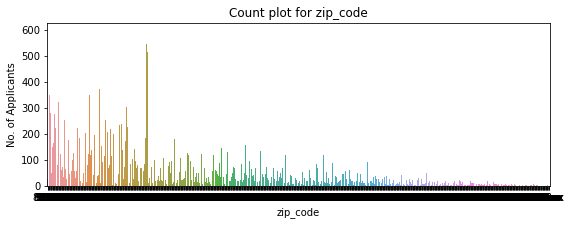

In [211]:
## PLotting a count plot
loan_df['zip_code'].value_counts(normalize=True)
draw_count_plot('zip_code')

## <font color=blue> Insight </font>
- Dropping column <font color=brown> <b>zip_code</b> </font>
- Zip code do not provide much information about the defaulters 
- To analyze the dafaulters as per different physical zones we can make use of field Address. Address field will provide more effective info as compared to zipcode
- We can drop this column

### Analyzying policy_code values

1    39717
Name: policy_code, dtype: int64


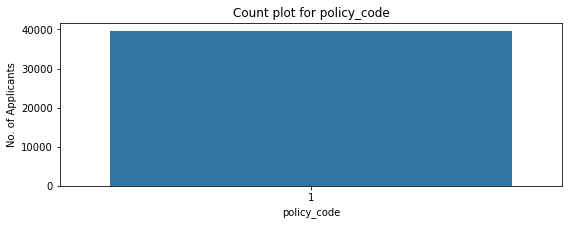

In [212]:
## Plotting a count plot
draw_count_plot('policy_code')

## <font color=blue> Insight </font>
- policy_code field contains only a single value 1
- Having a single value for all the rows will not impact the statistics
- We can drop this column

### Analyzying 'chargeoff_within_12_mths' values

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64


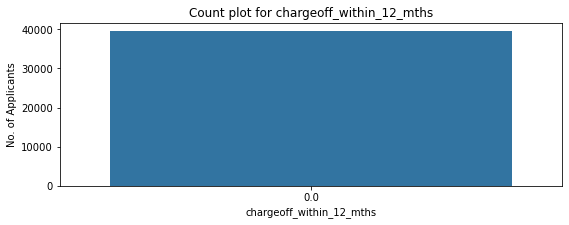

In [213]:
## Plotting a count plot
draw_count_plot('chargeoff_within_12_mths')


## <font color=blue> Insight </font>
- chargeoff_within_12_mths field contains only a single value 0.0
- Having a single value for all the rows will not impact the statistics
- We can drop this column

### Analyzying 'delinq_amnt' values

0    39717
Name: delinq_amnt, dtype: int64


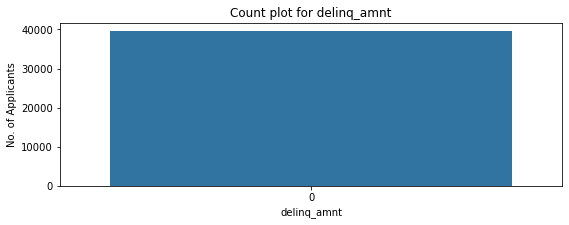

In [214]:
## Count plot
draw_count_plot('delinq_amnt')


## <font color=blue> Insight </font>
- delinq_amnt field contains only a single value 0
- Having a single value for all the rows will not impact the statistics
- We can drop this column

### Analyzying 'tax_liens' values

0.0    39678
Name: tax_liens, dtype: int64


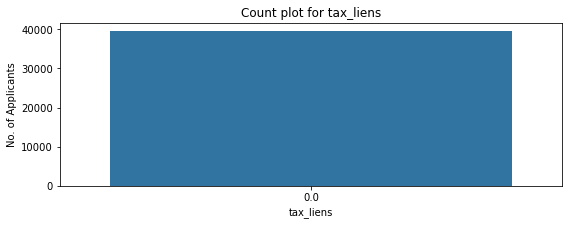

In [215]:
## PLotting count plot
draw_count_plot('tax_liens')

## <font color=blue> Insight </font>
- tax_liens field contains only a single value 0.0
- Having a single value for all the rows will not impact the statistics
- We can drop this column

### Analyzying 'collections_12_mths_ex_med' values

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64


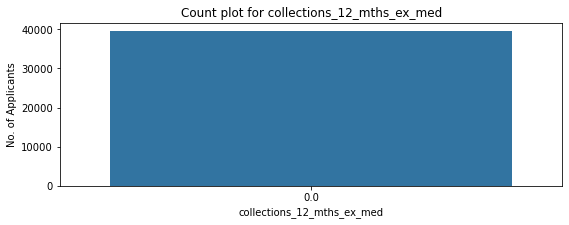

In [216]:
## PLotting a count plot
draw_count_plot('collections_12_mths_ex_med') 

## <font color=blue> Insight </font>
- collections_12_mths_ex_med field contains only a single value 0.0
- Having a single value for all the rows will not impact the statistics
- We can drop this column

### Analyzying initial_list_status

f    39717
Name: initial_list_status, dtype: int64


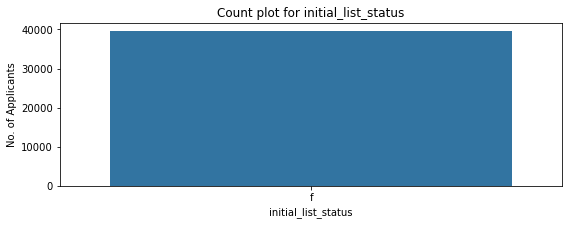

In [217]:
## Getting the values in initial_list_status and ploting a count plot 
loan_df['initial_list_status'].value_counts()
draw_count_plot('initial_list_status')

## <font color=blue> Insight </font>
- initial_list_status field contains only a single value f
- Having a single value for all the rows will not impact the statistics
- We can drop this column

### Analyzying url

In [218]:
loan_df['url'].value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

## <font color=blue> Insight </font>
- The url column is not usefull for any fure predictions
- It can provide the loanids, however these are all for on-going customers. Any new customers will not have these information
- We can drop this column

### Analyzying home_ownership

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


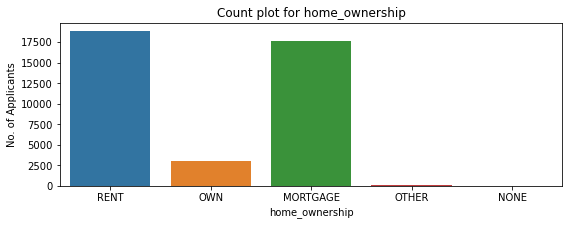

In [219]:
loan_df['home_ownership'].value_counts()
draw_count_plot('home_ownership')


## <font color=blue> Insight </font>
- This field could be an important field to analyze
- This may tell which category of house ownership falls into more defaulters

## Analyzing column revol_util

In [220]:

loan_df['revol_util'].value_counts()


0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

## <font color=blue> Insight </font>
- This field also do not help us in analysis as this is required for on going customers
- We can drop this column

## Final Observations on Delete unnecessary columns 
- zip_code
- policy_code
- chargeoff_within_12_mths
- delinq_amnt
- tax_liens
- collections_12_mths_ex_med 
- initial_list_status
- url
- revol_util

### These fields contains only a single value. As single value will not impact the analysis so will drop these columns

In [221]:
## Dropping the above list of columns

column_list = ['zip_code', 'policy_code', 'chargeoff_within_12_mths', 'delinq_amnt','tax_liens','collections_12_mths_ex_med','initial_list_status', 'url', 'revol_util']

print(f'shape of dataframe before dropping columns {loan_df.shape}')
loan_df = loan_df.drop(column_list, axis=1)
print(f'shape of dataframe after dropping columns {loan_df.shape}')

shape of dataframe before dropping columns (39717, 33)
shape of dataframe after dropping columns (39717, 24)


In [222]:
## Checking updated null value count
loan_df.isnull().sum().sort_values(ascending=False)

emp_title               2459
emp_length              1075
pub_rec_bankruptcies     697
title                     11
annual_inc                 0
acc_now_delinq             0
dti                        0
addr_state                 0
purpose                    0
pymnt_plan                 0
loan_status                0
issue_d                    0
verification_status        0
id                         0
member_id                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
funded_amnt                0
loan_amnt                  0
home_ownership             0
dtype: int64

## <font color=blue> Insight </font>
- emp_title, emp_length, pub_rec_bankruptcies and title contains null values    
- Will analyse more on these fields ahving null values 

## filling 'not Available' value to the null values of title
- We can fill 'Not Available' to the null values instead of removing these
- As dropping the rows might impact some of other stats

In [223]:
loan_df['title'].fillna('Not Available', inplace=True)
print(loan_df['title'].isnull().sum())

0


## <font color=blue> Insight </font>
- Title do not have much impact on the analysis
- However dropping associated rows might loose few other information
- Therefore, all null values has been replaced with 'Not Available'

## filling 'not Available' value to the null values of emp_title

In [224]:
loan_df['emp_title'].fillna('Not Available', inplace=True)
print(loan_df['emp_title'].isnull().sum())

0


## <font color=blue> Insight </font>
- All null values has been replaced with 'Not Available'

### Assigning 999 to null values for pub_rec_bankruptcies

In [225]:
loan_df['pub_rec_bankruptcies'].fillna(999, inplace=True)
print(loan_df['pub_rec_bankruptcies'].isnull().sum())

0


## <font color=blue> Insight </font>
- Dropping associated rows for the null values might impact the analysis
- As the field is categorical we replaced null values with a very high value`

### 2.2.g : Split columns for more data like url, date etc

### issue_d : Deriving columns
- Will create two derived columns of month and year for more analysis


In [226]:
## Creating field month
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['month'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['month']

## Creating field year
loan_df['year'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: year, Length: 39717, dtype: int64

## <font color=blue> Insight </font>
- Month column extracted the month value from issue_d field
- Year column extracted the year value from issue_d field

### 2.2.h : Merge column for identifiers

In [227]:
## Observations:
## No available columns to get merged

### 2.2.i : Allign Misalligned columns

## <font color=blue> Insight </font>
-  Data seems to be alligned properly. No shifting of data is required

## 2.3 Standardise Values

### Standardising column 'term'

In [228]:
## Analyzing column 'term'

print(loan_df['term'].value_counts())

## Observations::
## we can convert the field type to int and rename the column to terms in months

## Extract the digit value from the field
loan_df['term'] = loan_df['term'].str.strip('months')

## Convert the field type to int
loan_df['term'] = loan_df['term'].astype("int")


## rename column term to term in months
loan_df.rename(columns={'term':'term_in_months'}, inplace=True)

# checking the values in the renamed field 
print('post rename and modifying the column values --------')
print(loan_df['term_in_months'].value_counts())

# Checking the field type
print(loan_df['term_in_months'].dtype)

 36 months    29096
 60 months    10621
Name: term, dtype: int64
post rename and modifying the column values --------
36    29096
60    10621
Name: term_in_months, dtype: int64
int32


## <font color=blue> Insight </font>
- Column term is of data type object
- Removed the '%' from the values and converted the type to int for further analysis 

### Standardising column 'int_rate'

In [229]:
## Analyzing the column 'int_rate'

print(loan_df['int_rate'])

## Remove the % from the field value
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%')

## Convert the field type to int
loan_df['int_rate'] = loan_df['int_rate'].astype("float")

print('-------- post modifying the column values --------')
print(f"{loan_df['int_rate'].value_counts()}")
print(f"Modified data type - {loan_df['int_rate'].dtype}")

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object
-------- post modifying the column values --------
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64
Modified data type - float64


In [230]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,acc_now_delinq,pub_rec_bankruptcies,month,year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,Not Available,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,0,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,Not Available,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,0,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00,0,0.0,12,2011
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,Personal,OR,17.94,0,0.0,12,2011


## 2.4 Fix invalid values

In [231]:
## Observations:
## Few of the column types have been changed to int after data modification

## 2.5 Filter data

### 2.5.a : Duplicated Data

In [232]:
## Check whether any duplictae entry is present. Will analyze the column id

print(f"Unique values in the column id - {loan_df['id'].nunique()}")

## Observation:
## The count of unique values are equal to the total rows. i.e., no duplicate entries are present


Unique values in the column id - 39717


### 2.5.b : Filter Rows

In [233]:
## Observations:
## The rows having null values are droped. In this data set no such rows present which pressent all null values

### 2.5.c : Filter Columns

In [234]:
## Observations:
## Columns containing all null values have been droped
## Unwanted columns which will not contribute in the analysis have been droped

## ---- DATA CLEANING DONE -----

In [235]:
print(loan_df.isnull().sum().sort_values(ascending=False))
print(f'Final shape of data set - {loan_df.shape}')

emp_length              1075
id                         0
verification_status        0
month                      0
pub_rec_bankruptcies       0
acc_now_delinq             0
dti                        0
addr_state                 0
title                      0
purpose                    0
pymnt_plan                 0
loan_status                0
issue_d                    0
annual_inc                 0
member_id                  0
home_ownership             0
emp_title                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term_in_months             0
funded_amnt_inv            0
funded_amnt                0
loan_amnt                  0
year                       0
dtype: int64
Final shape of data set - (39717, 26)


## <font color=blue> Insights post Data Cleaning</font>
- There are few columns which contains null values
- Will analyze more on these columns in Univariate analysis and take decisions
- There are no rows having all null values
- All column header and footer are fine
- Columns containing all null values have been dropped
- Columns having single unique values have also been dropped as these column will have no impact in the analysis
- After data cleaning we have <font color=brown> <b>39717</b> </font> rows and <font color=brown> <b>27</b> </font> columns

# <font color=blue> Univariate Analysis </font>

In [236]:
## For numerical column analysis
def plot_hist(column_name):
    print(f"--- column :: {column_name}")
    plt.figure(figsize = (9,3))
    ax=plt.subplot()
    plt.hist(loan_df[column_name], bins = 50)
    plt.xlabel(column_name)
    
    ## Rotating the ticks by 90 degree if number of values are more than 10
    if loan_df[column_name].nunique() > 10:
        plt.xticks(rotation=90)
    
    plt.ylabel("Loan Application Count")
    plt.title("{} distribution with hist".format(column_name))
    

    plt.show()
    print(f"{loan_df[column_name].value_counts()}")

In [237]:
## For non-numerical column analysis
def bar_plot(column_name):
    print(f"--- column :: {column_name}")
    # get feature
    var = loan_df[column_name]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    ax=plt.subplot()
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
   
    ## Rotating the ticks by 90 degree if number of values are more than 10
    if loan_df[column_name].nunique() > 10:
        plt.xticks(rotation=90)
        
    plt.ylabel("Loan Application Count")
    plt.title(column_name)

    plt.show()
    print("{}: \n {}".format(column_name,varValue))

## Univariate :: Numerical Column Analysis

### Extracting all the numerical columns

In [238]:
## 1. Extracting the numerical columns

loan_num_columns = loan_df.select_dtypes(include="number")
print(loan_num_columns.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_in_months', 'int_rate', 'installment', 'annual_inc', 'dti', 'acc_now_delinq', 'pub_rec_bankruptcies', 'month', 'year'], dtype='object')


### Numerical colums
- id
- member_id
- loan_amnt
- funded_amnt
- funded_amnt_inv
- term_in_months
- int_rate
- installment
- annual_inc
- dti
- revol_util
- acc_now_delinq
- pub_rec_bankruptcies
- month
- year

<br>

## <font color=blue> Insights </font>
- Will analyze each of these numerical columns as a histogram plot

### Plotting the histogram for the numerical columns for more insights

--- column :: loan_amnt


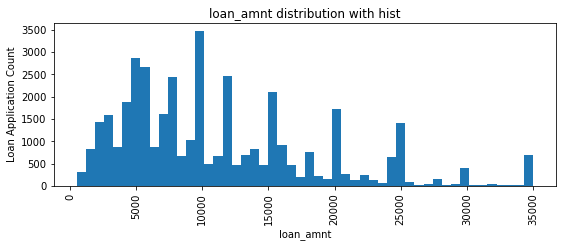

10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64
--- column :: funded_amnt


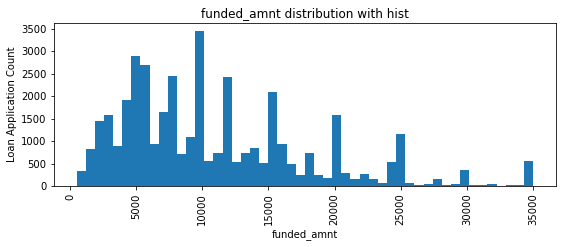

10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64
--- column :: funded_amnt_inv


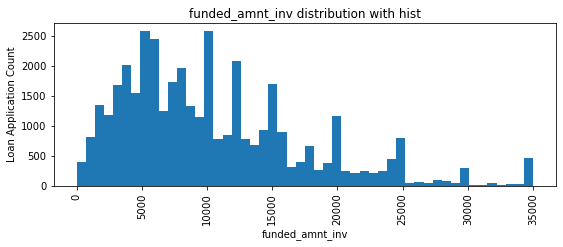

5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000       1
6294.151315        1
11808.924370       1
Name: funded_amnt_inv, Length: 8205, dtype: int64
--- column :: term_in_months


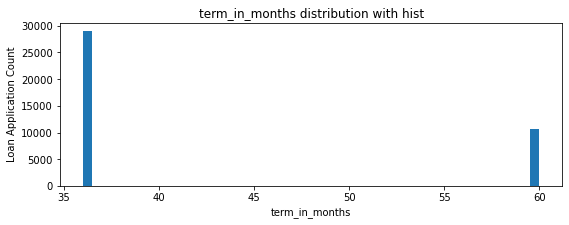

36    29096
60    10621
Name: term_in_months, dtype: int64
--- column :: int_rate


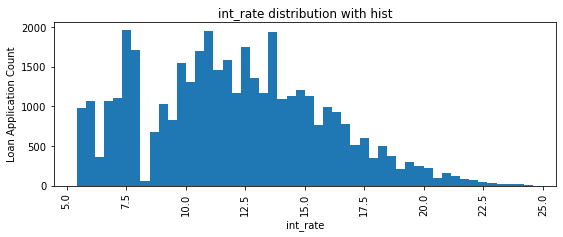

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64
--- column :: installment


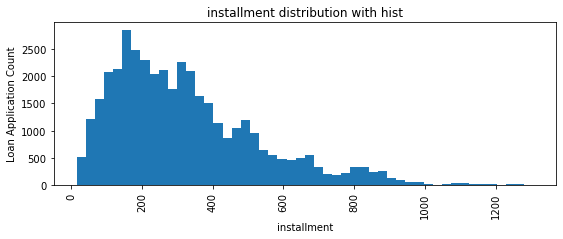

311.11     68
180.96     59
311.02     54
150.80     48
368.45     46
           ..
1224.46     1
63.44       1
157.67      1
492.34      1
255.43      1
Name: installment, Length: 15383, dtype: int64
--- column :: annual_inc


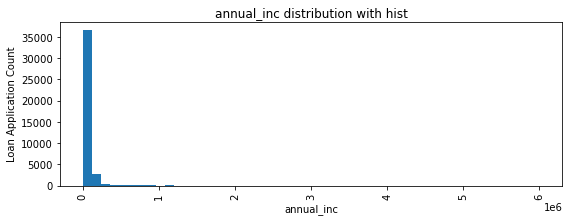

60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: annual_inc, Length: 5318, dtype: int64
--- column :: dti


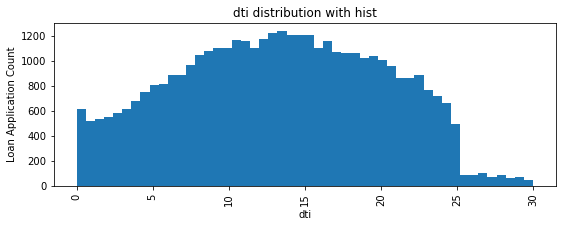

0.00     183
12.00     51
18.00     45
19.20     40
13.20     39
        ... 
29.13      1
25.31      1
29.76      1
28.42      1
25.43      1
Name: dti, Length: 2868, dtype: int64
--- column :: acc_now_delinq


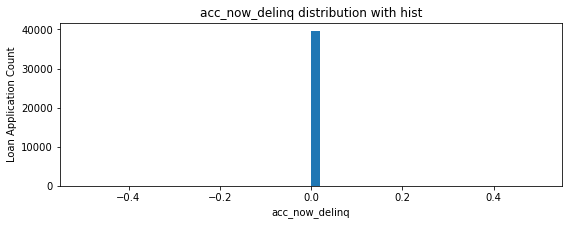

0    39717
Name: acc_now_delinq, dtype: int64
--- column :: pub_rec_bankruptcies


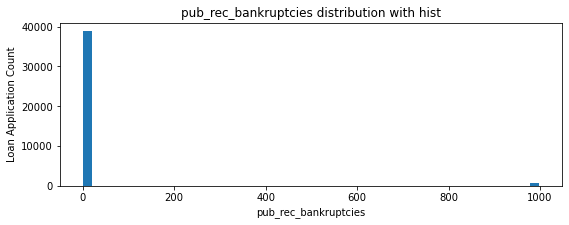

0.0      37339
1.0       1674
999.0      697
2.0          7
Name: pub_rec_bankruptcies, dtype: int64
--- column :: month


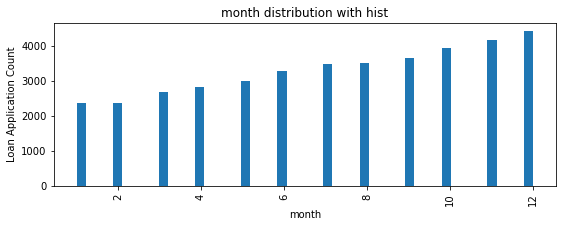

12    4433
11    4167
10    3934
9     3648
8     3518
7     3476
6     3279
5     2999
4     2834
3     2692
1     2379
2     2358
Name: month, dtype: int64
--- column :: year


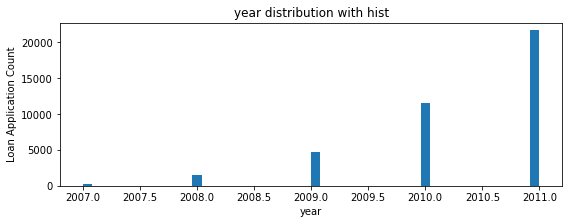

2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: year, dtype: int64


In [239]:
## 2. PLotting the histogram

## Creating a loop to plot the histogram
for col in loan_num_columns:
    num_unique_value = loan_df[col].nunique()
    # It will ignore the column having all unique values like - id, member_id etc
    if num_unique_value != loan_num_columns.shape[0]:
        plot_hist(col)

### Analysing field pub_rec_bankruptcies

In [240]:
## Analyzing pub_rec_bankruptcies

print(loan_df['pub_rec_bankruptcies'].isnull().sum())
print(loan_df['pub_rec_bankruptcies'].value_counts(normalize=True))

# loan_df['emp_length'].fillna('Not Available', inplace=True)

0
0.0      0.940126
1.0      0.042148
999.0    0.017549
2.0      0.000176
Name: pub_rec_bankruptcies, dtype: float64


### <font color=blue> Insight for the field pub_rec_bankruptcies </font>
- Around 95 % of data belongs to the group 0.0
- 697 are null values, Assigning them to any of the groups might impact the stats
- As of now lets keep the data as it is and will observe more in the bivariate or multivariate analysis

### <font color=blue> Insight post univariate Analysis for numerical fields </font>

1. Fields <b>loan_amnt, funded_amnt and funded_amnt_inv </b>are continuous data sets are need to be analyzed further by creating bins
2. More Applicants have opted the loan for a tenure of 60 months as compared to 36. Will analyze further which catergory has more charged off
3. Separate Bins to be created for <b>int_rate, dti, annual_inc </b> and to be anlysed further
4. <b>December month </b> shows a peak in the loan applicants
5. <b>2011</b> has shown is high rise of loan may be due to economy crash down
6. Fields <b>id, member_id, installment, revol_util, acc_now_delinq</b> may not contribute towards the target column(loan_status). So will not consider these fields for further analysis
7. As <b>pub_rec_bankruptcies</b> contains some null values . Have not assigned any value to the null valuesneither dropped  as it might impact the analysis

## Univariate :: Non-Numerical Column Analysis

### Extracting the non-numeric columns for analysis

In [241]:
## 1. Getting the non-numerical columns

loam_non_num_col = loan_df.select_dtypes(exclude="number")
print(loam_non_num_col.columns)

Index(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state'], dtype='object')


### Non numerical column list
1. grade
2. sub_grade
3. emp_title
4. emp_length
5. home_ownership
6. verification_status
7. issue_d
8. loan_status
9. pymnt_plan
10. purpose
11. title
12. addr_state

## <font color=blue> Insights </font>
- Will analyze each of these numerical columns in bar plot

### Plotting the bar plot for all the above non-numeric fields

--- column :: grade


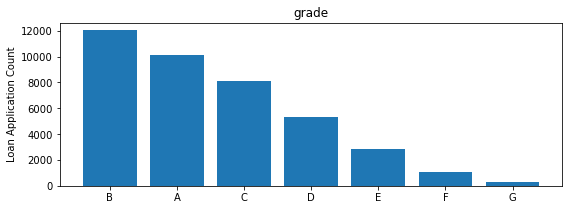

grade: 
 B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64
--- column :: emp_length


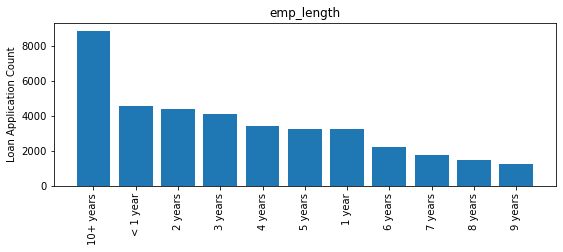

emp_length: 
 10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
--- column :: home_ownership


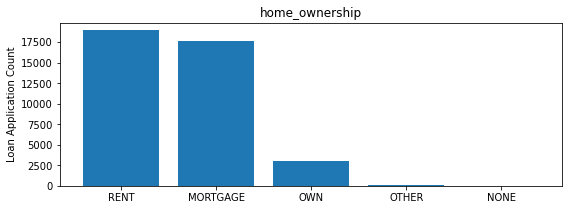

home_ownership: 
 RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
--- column :: verification_status


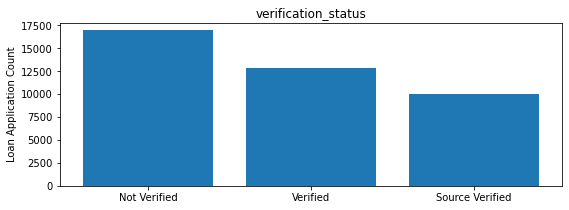

verification_status: 
 Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64
--- column :: loan_status


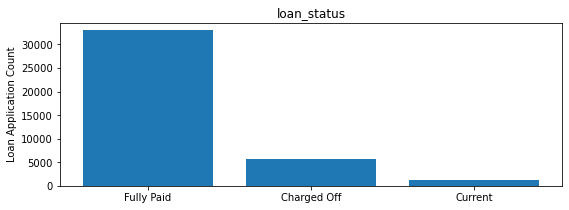

loan_status: 
 Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64
--- column :: pymnt_plan


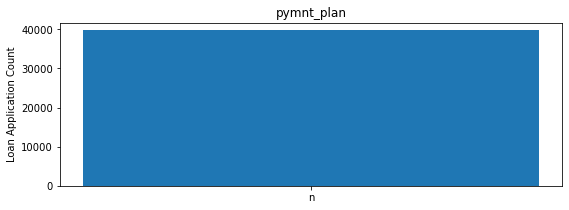

pymnt_plan: 
 n    39717
Name: pymnt_plan, dtype: int64
--- column :: purpose


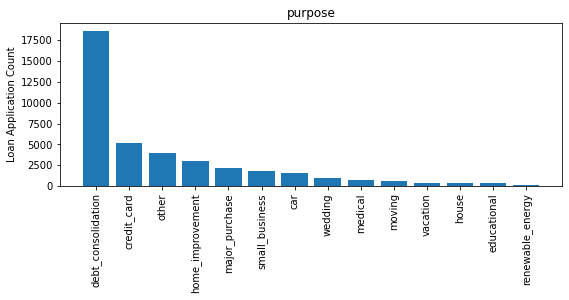

purpose: 
 debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64


In [242]:
## 2. PLotting the barplot

for col in loam_non_num_col.columns:
    num_unique_value = loan_df[col].nunique()
    if num_unique_value <= 15:
        bar_plot(col)

### Analysing pymnt_plan field

In [243]:
## pymnt_plan
## payment plan field contains a single value.it will not impact the analysis
print(f'shape of dataframe before dropping columns {loan_df.shape}')
loan_df = loan_df.drop(['pymnt_plan'], axis=1)
print(f'shape of dataframe after dropping columns {loan_df.shape}')

shape of dataframe before dropping columns (39717, 26)
shape of dataframe after dropping columns (39717, 25)


## <font color=blue> Insights </font>
- pymnt_plan field contains a single value
- This field will not impact the analysis
- <b>Dropping</b> this column

### Analysing fields - <b>sub_grade, emp_title, title, addr_state</b>
- These fields were not included in the above plots as the values these fields have are more than <b>15</b>
- The above plots includes the fields having unique values lest than equal to 15 

### 1. sub_grade

--- column :: sub_grade


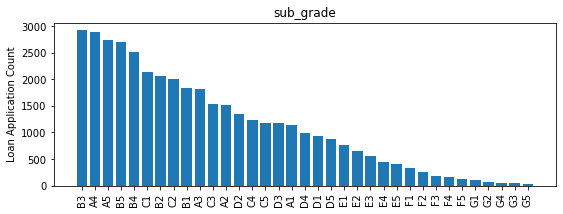

sub_grade: 
 B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64


In [244]:
bar_plot('sub_grade')

## <font color=blue> Insights </font>
- From this graph, wew can say sub_grade of G has the lowest no of applicants and sub_grades of A & B geing heighest
- This field can be an impotant field for analysis
- In Bvariate analysis we can get what percentage of applicants are charged off in each sub_grades

### 2. emp_title

In [245]:
## Getting the number of unique values in the employee title column 
loan_df['emp_title'].nunique()

28821

## <font color=blue> Insights </font>
- emp_title contains a huge list of data 
- It may not contribute much on the analysis
- One thing we can derive is which employee title falls under maxima - minima charged off and fully paid
- We can crete a pivot table for this and observe in the bivariate analysis 

### 3. title

In [246]:
## Getting the number of unique values in the title column 
loan_df['title'].nunique()

19616

## <font color=blue> Insights </font>
- emp_title contains a huge list of data 
- It shall not contribute anything to the analysis

In [247]:
### 4. addr_state

In [248]:
## Getting the number of unique values in the addr_state column 
loan_df['addr_state'].nunique()

50

## <font color=blue> Insights </font>
- Nothing much information we can derive from this univariate analysis
- Will plot in the bivariate category to figure out which area shows high in defaulters

### Ordered and unordered categorical variables

### 1. loan_status

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64


<Figure size 720x432 with 0 Axes>

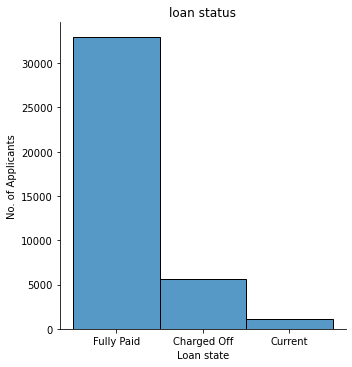

In [249]:
### Analyse the column loan_status, Lets find out what percentage of loan status for different category occupy 
## Lets plot a distribution plot for it

print(loan_df['loan_status'].value_counts(normalize=True))

plt.figure(figsize=(10,6))
sns.displot(loan_df['loan_status'])
plt.title('loan status')
plt.xlabel('Loan state')
plt.ylabel('No. of Applicants')
plt.show()


## Observation:
## 
## 

## <font color=blue> Insights </font>
- Nearly more than 80% loans have been fully paid, and around 14 % are charged Off
- Will consider fully paid and charged off data set for our future analysis
- Current loan status does not provide any insights to future data sets

### 2. loan_status

In [250]:
## Lets analyze the column loan_amnt. How much loan has been applied
## As it is a numeric field get gets some stats for this column

loan_df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

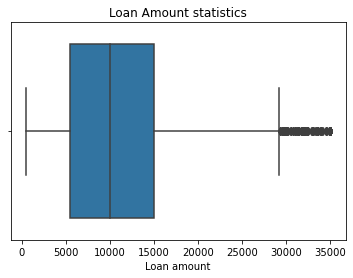

In [251]:
## Plotting a box plot for more understanding and visualize any outliers for it

sns.boxplot(loan_df['loan_amnt'])
plt.title('Loan Amount statistics')
plt.xlabel('Loan amount')
plt.show()

## Observations:
## Few of the records lie in the higher loan amount taken and are in the section of outliers

## <font color=blue> Insights </font>
- Few outliers are present.
- Loan amouny outliers may not impact much.

<Figure size 720x720 with 0 Axes>

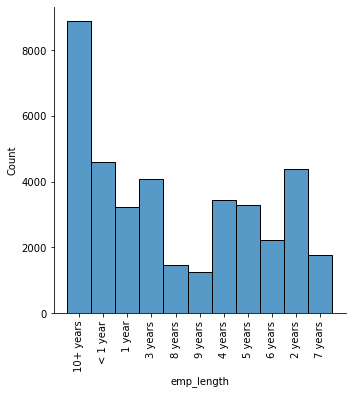

In [252]:
## Now lets get the statistics for the column emp_length
## Its a segmented data, lets view the distribution plot for it

plt.figure(figsize=(10,10))
sns.displot(loan_df['emp_length'])
plt.xticks(rotation=90)
plt.show()


## <font color=blue> Insights </font>
- A high frequency of employees having more than 10+ years of experience avail the loan


### <font color=blue> Removing Outliers </font>

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

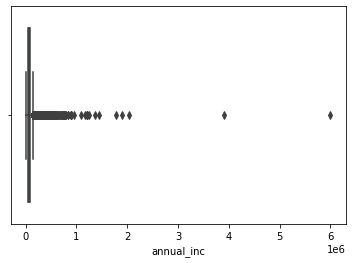

In [253]:
## Analyze annual_inc

print(loan_df['annual_inc'].describe())
sns.boxplot(loan_df['annual_inc'])

## <font color=blue> Insights </font>
- Outliers in Annual income may impact the analysis
- Removed the outliers using Inter Quartile 

(39717, 25)
(34345, 25)
count     34345.000000
mean      55276.120460
std       21612.879355
min        4000.000000
25%       38970.810000
50%       53004.000000
75%       70600.000000
max      103241.000000
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

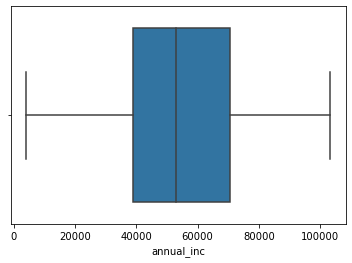

In [254]:
print(loan_df.shape)

# 1st Quartile
Q1 = np.percentile(loan_df['annual_inc'],25)

# 3rd quartile
Q3 = np.percentile(loan_df['annual_inc'],75)
        
# Inter Quartile Range IQR
IQR = Q3 - Q1

# Outlier step
size = IQR * 1.5

## Lower fence
lower_fence = Q1-size

## Upper fence
upper_fence = Q1 + size

loan_df_non_outliers = loan_df[(loan_df['annual_inc'] > lower_fence) & (loan_df['annual_inc'] < upper_fence)]

# value  = np.percentile(loan_df['annual_inc'], 92.5)
# loan_df_non_outliers = loan_df[loan_df['annual_inc'] <= value]

print(loan_df_non_outliers.shape)
print(loan_df_non_outliers['annual_inc'].describe())
sns.boxplot(loan_df_non_outliers['annual_inc'])


## <font color=blue> Insights </font>
- Outliers have been removed
- From here we will e using the modified data set <b>`loan_df_non_outliers`<b>
- Nearly 5372 rows has been removed as outliers
- Final shape of data set contains <b>34345</b> rows and <b>26</b> columns

### Box plot for int_rate
- Just to check if any interest rate falls under very high value

<AxesSubplot:xlabel='int_rate'>

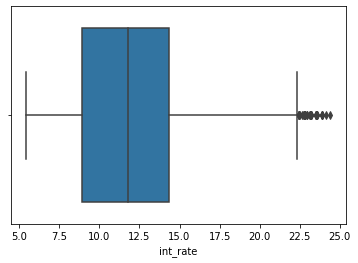

In [255]:
sns.boxplot(loan_df_non_outliers['int_rate'])

### int_rate dristribution plot

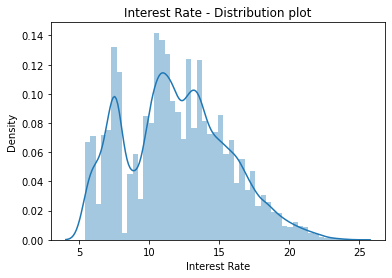

In [256]:
sns.distplot(loan_df_non_outliers['int_rate'])
plt.xlabel('Interest Rate')
plt.title('Interest Rate - Distribution plot')
plt.show()

## <font color=blue> Insights </font>
- Interest rate within the range of 10-15 are taken

In [257]:
### Loan Amount distribution plot

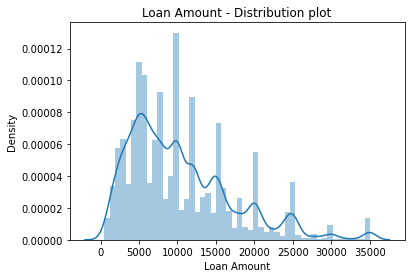

In [258]:
sns.distplot(loan_df_non_outliers['loan_amnt'])
plt.xlabel('Loan Amount')
plt.title('Loan Amount - Distribution plot')
plt.show()

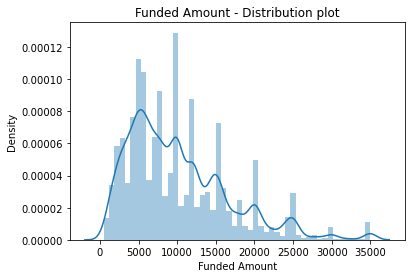

In [259]:
sns.distplot(loan_df_non_outliers['funded_amnt'])
plt.xlabel('Funded Amount')
plt.title('Funded Amount - Distribution plot')
plt.show()

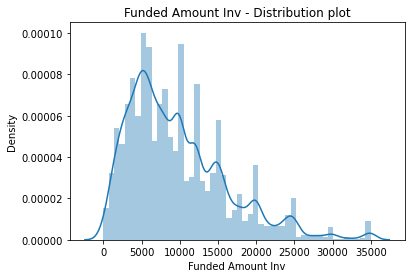

In [260]:
sns.distplot(loan_df_non_outliers['funded_amnt_inv'])
plt.xlabel('Funded Amount Inv')
plt.title('Funded Amount Inv - Distribution plot')
plt.show()

## <font color=blue> Insights </font>
- Distribution plot for all three amounts loan_amnt, funded_amnt and funded_amnt_inv looks very similar
- Will analyze these field in bivariate for more insights
- Loan amount in the range of 5000 to 15000 are opted the most

<AxesSubplot:xlabel='dti'>

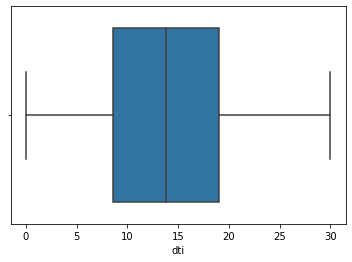

In [261]:
sns.boxplot(loan_df_non_outliers['dti'])

## <font color=blue> Insights post Univariate Analysis </font>
1. More applicants are under Grade B and very less in Grade G
2. Most loans are taken by employees having less than a year of experience
3. Customers occupying home as rent and Mortgage seems to take more loan
4. Non verified customers have taken more loan
5. Customers took loan for the pupose of debt_consolidation and credit card payments
6. sub_grade, emp_title and addr_state will be analysed more for any insights
7. Interest rate within the range of 10-15 % are taken the most
8. Loan amount within 5000 to 15000 are opted the most

# <font color=blue> Bivariate Analysis </font>

- As per the Objective our target column is loan_status
- We need to analyse loan_status data against each of the field to know its distribution
- Also we need to consider only the data corresponding to loan status as `Fully Paid` and `Charged Off`
- Loan status for the current will not provide any insights for our analysis as we need to predict for the new applicants

## Target Column :: loan_status
- As our objective is to find out the defaulters from a new dat set we need to analyse all columns with loan_status as this column will provide the information in each column indicating the defaulters criteria 

### Creating dataframe consisting data of loan_status fully paid and charged off

In [262]:
loan_data_non_current = loan_df_non_outliers[loan_df_non_outliers['loan_status'] != 'Current']
loan_data_non_current.shape

(33397, 25)

In [263]:
loan_data_non_current.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,acc_now_delinq,pub_rec_bankruptcies,month,year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,Not Available,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,0.0,12,2011


### Analysis of <font color=blue><b>numerical column</b> </font> vs <font color=blue><b>loan_status</b> </font>

- Lets consider the below numerical columns for the analysis with loan_status column<br>
- Ignoring Columns for analysis - <b>id, member_id, installment,revol_util, acc_now_delinq</b>, as these columns can not conclude towards the loan_status
- Below fields considered : 
<br>
1. loan_amnt
2. funded_amnt
3. funded_amnt_inv
4. term_in_months
5. int_rate
6. annual_inc
7. dti
8. month
9. year
10. pub_rec_bankruptcies


In [264]:
def show_crosstab(column_name):
    print(f"------ {column_name} vs loan_status ------ ")
    pd.crosstab(loan_data_non_current[column_name],loan_data_non_current.loan_status).plot(kind="bar",figsize=(9,4))
    plt.title(f'Loan status as per {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('No. of Applicants')
    plt.show()

## Create bins for loan_amnt, funded_amnt, funded_amnt_inv

In [265]:
def show_crosstab_for_amounts(column_name):
    derived_column = column_name + "_bins"
    bins_range = [0,5000,10000,15000,20000,25000,30000,35000]
    amount_labels = ['5k','10k','15k','20k','25k','30k','35k']
    loan_data_non_current[derived_column] = pd.cut(x=loan_df_non_outliers['loan_amnt'], bins=bins_range,labels=amount_labels)
    show_crosstab(derived_column)

### 1. loan_amnt vs loan_status

------ loan_amnt_bins vs loan_status ------ 


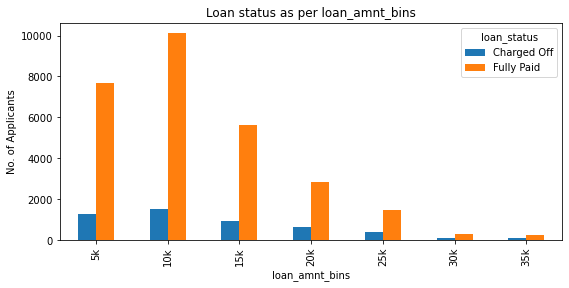

In [266]:
show_crosstab_for_amounts('loan_amnt')

### 2. funded_amnt vs loan_status

------ funded_amnt_bins vs loan_status ------ 


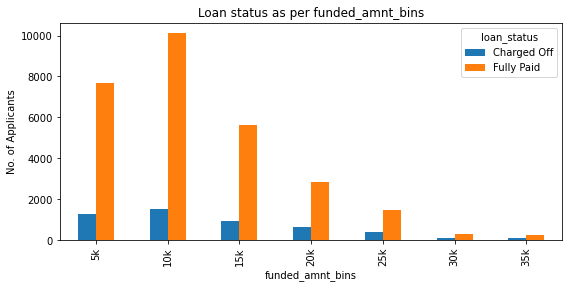

In [267]:
show_crosstab_for_amounts('funded_amnt')

### 3. funded_amnt_inv vs loan_status

------ funded_amnt_inv_bins vs loan_status ------ 


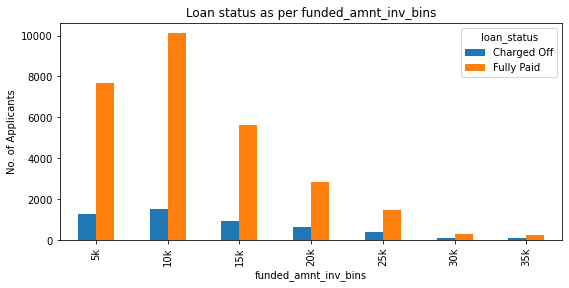

In [268]:
show_crosstab_for_amounts('funded_amnt_inv')

### 4. term_in_months vs loan_status

------ term_in_months vs loan_status ------ 


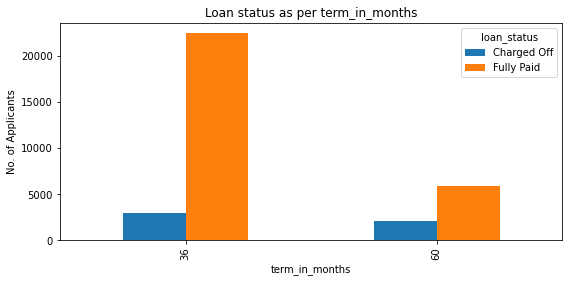

In [269]:
show_crosstab('term_in_months')

### 5. int_rate vs loan_status

### We need to create different bins for the field int_rate  

------ int_rate_category vs loan_status ------ 


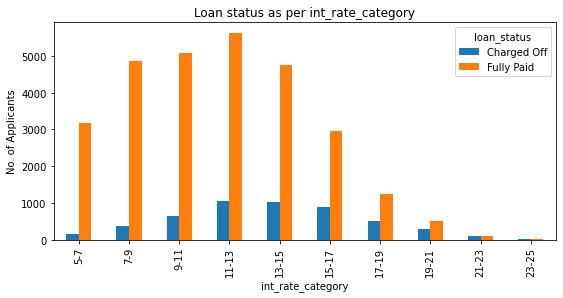

In [270]:
### Create bins for interest rate : convert continuous data to categorical
int_bins = [5,7,9,11,13,15,17,19,21,23,25]
int_labels = ['5-7','7-9','9-11','11-13','13-15','15-17','17-19','19-21','21-23','23-25']
loan_data_non_current['int_rate_category'] = pd.cut(x=loan_data_non_current['int_rate'], bins=int_bins,labels=int_labels)

# plt.figure(figsize=(15,10))

# data1 = pd.pivot_table(data=loan_df_non_outliers, index='int_rate_category', columns = 'loan_status', aggfunc='count')['annual_inc']
# data1.plot.bar()
# plt.show()

show_crosstab('int_rate_category')

### 6. annual_inc vs loan_status

------ income_category vs loan_status ------ 


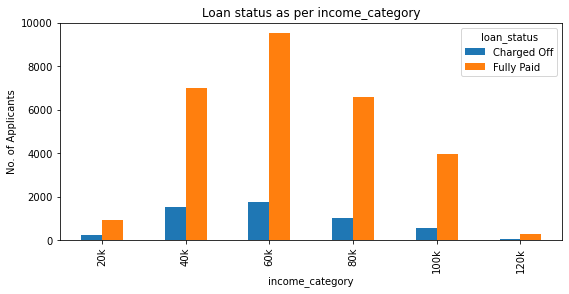

In [271]:

## Create bins
income_bins = [0,20000,40000,60000,80000,100000,120000,140000]
int_labels = ['20k','40k','60k','80k','100k','120k','140k']
loan_data_non_current['income_category'] = pd.cut(x=loan_data_non_current['annual_inc'], bins=income_bins,labels=int_labels)

show_crosstab('income_category')

### 7. dti vs loan_status

------ dti_category vs loan_status ------ 


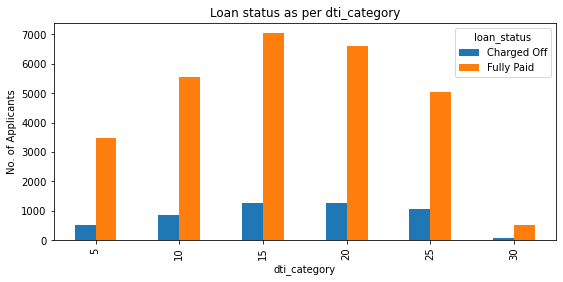

In [272]:

## Create bins
dti_bins = [0,5,10,15,20,25,30,35]
dti_labels = ['5','10','15','20','25','30','35']
loan_data_non_current['dti_category'] = pd.cut(x=loan_data_non_current['dti'], bins=dti_bins,labels=dti_labels)

show_crosstab('dti_category')

### 8. month vs loan_status

------ month vs loan_status ------ 


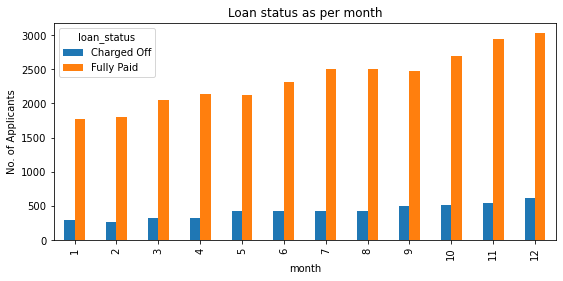

In [273]:
show_crosstab('month')

### 9. year vs loan_status

------ year vs loan_status ------ 


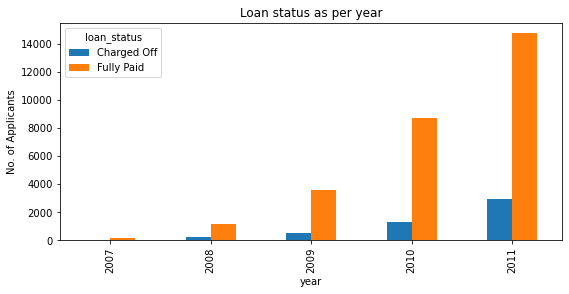

In [274]:
show_crosstab('year')

### Insight
 - 2011 - year of crisis Economy not in a good shape chances of defaulter may increase

### 10. pub_rec_bankruptcies vs loan_status

------ pub_rec_bankruptcies vs loan_status ------ 


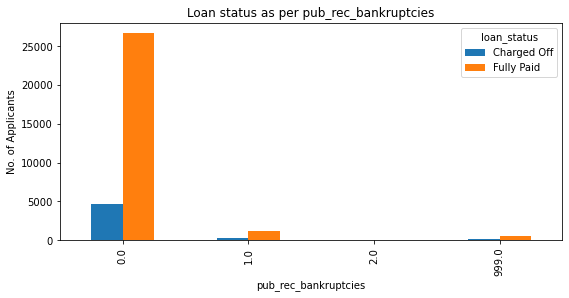

In [275]:
show_crosstab('pub_rec_bankruptcies')

### <font color=blue> Insights : purpose vs loan_status </font>
- value 0 seems to have higher charged off, however number of applicants too are also high in this category
- Taking the propotionate we can derive value 1 and 0 have more charged off

### Analysis of <font color=blue><b>non-numerical column</b> </font> vs <font color=blue><b>loan_status</b> </font>

In [276]:
## Getting the non-numerical columns
non_numerical_columns = loan_data_non_current.select_dtypes(exclude="number").columns
print(non_numerical_columns)

Index(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'loan_amnt_bins', 'funded_amnt_bins', 'funded_amnt_inv_bins', 'int_rate_category', 'income_category', 'dti_category'], dtype='object')


### Columns considered for analysis
1. grade
2. sub_grade
3. emp_length
4. home_ownership
5. verification_status
6. purpose

### Plotting crosstab plot for all above columns against loan_status

------ grade vs loan_status ------ 


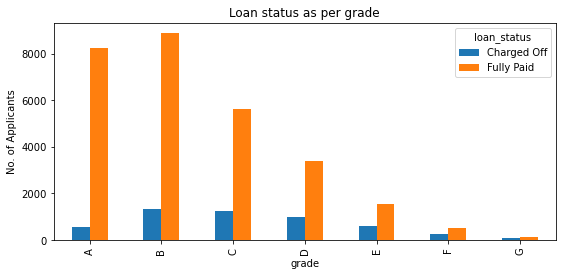

------ sub_grade vs loan_status ------ 


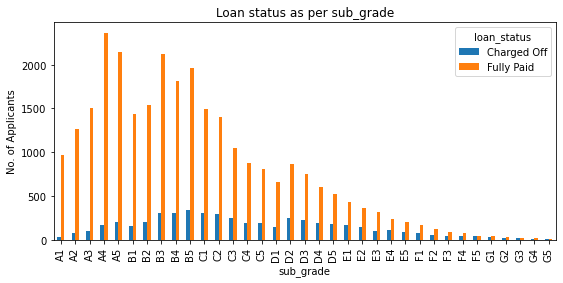

------ emp_length vs loan_status ------ 


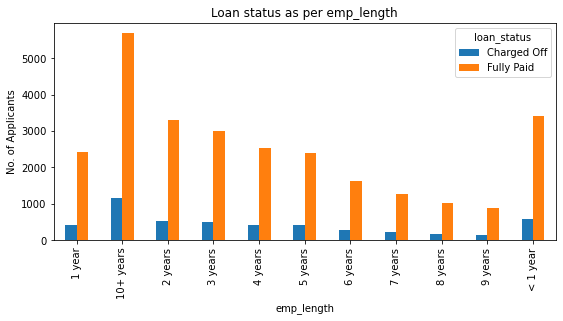

------ home_ownership vs loan_status ------ 


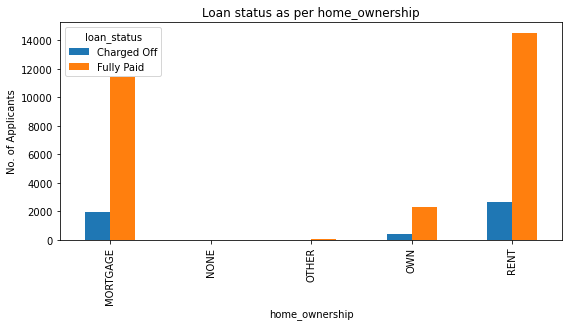

------ verification_status vs loan_status ------ 


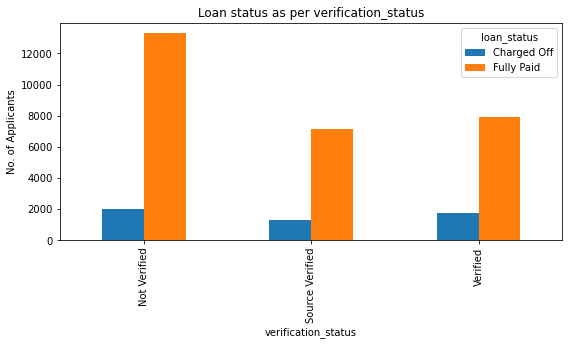

------ purpose vs loan_status ------ 


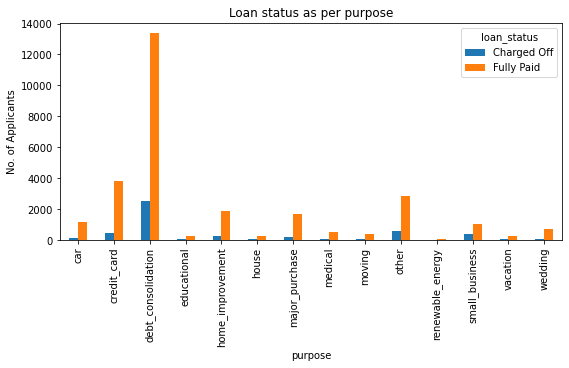

In [277]:
column_list = ['grade','sub_grade','emp_length','home_ownership','verification_status', 'purpose']
for col in column_list:
    show_crosstab(col)

### Analysing from the above graphs following insights can be derived 

### <font color=blue> Insights : grade vs loan_status </font>
- Grade B and C seems to have more charged off
- Grade A seems to be better of accepting loan having more fully paid and less defaulters

### <font color=blue> Insights : sub_grade vs loan_status </font>
- It is quite similar to grade analysis done above
- Will do some analysis taking only the charged off data and observing the behavior

### <font color=blue> Insights : emp_length vs loan_status </font>
- Surprisingly Employees having more than 10 years of experience have more defaulters
- Also employees with less than 1 year of experience shows more defaulters

### <font color=blue> Insights : home_ownership vs loan_status </font>
- Customers having house type as rent or mortgage are more likely to default

### <font color=blue> Insights : verification_status vs loan_status </font>
- This could be quite obvious, non verified customers are likely to defualt more than that of verified customers

### <font color=blue> Insights : purpose vs loan_status </font>
- Customers taking loan for debt_consolidation and credit card payments are more charged off

## We shall consdered the important set of fields with only charged off data to get more insights

## <font color=blue> Taking only charged Off data set </font> 

In [278]:

loan_df_charged_off = loan_data_non_current[loan_data_non_current['loan_status'] == 'Charged Off']
loan_df_charged_off.shape

(5066, 31)

### Analysing anuual income in different bins for charged off data

<AxesSubplot:xlabel='income_category', ylabel='count'>

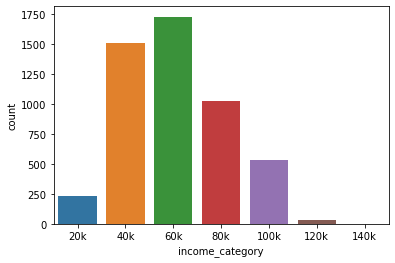

In [279]:
## Create bins
income_bins = [0,20000,40000,60000,80000,100000,120000,140000]
int_labels = ['20k','40k','60k','80k','100k','120k','140k']
loan_df_charged_off['income_category'] = pd.cut(x=loan_df_charged_off['annual_inc'], bins=income_bins,labels=int_labels)
sns.countplot(data=loan_df_charged_off, x=loan_df_charged_off['income_category'])

### <font color=blue> Insights </font>
- Customers having an average income of <b>60k</b> are more likely to be charged off

### Analysis of charged off accounts w.r.t. year and month

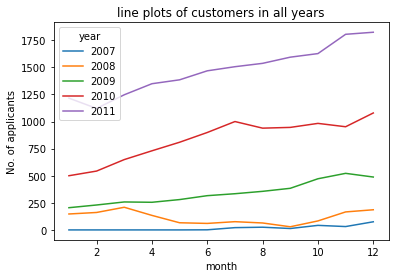

In [280]:
month_yr_data = pd.pivot_table(data= loan_data_non_current, index ='month', columns='year', aggfunc='count', fill_value=0 )['id']
month_yr_data.plot()
plt.ylabel("No. of applicants")
plt.title("line plots of customers in all years")
plt.show()

### Insights
 - 2011 - year of crisis Economy not in a good shape chances of defaulter may increase
 
### suggestions
 - Acquisition can be slow down to decrease the chances of defaulters in a stressed economy

### funded_amnt_inv

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Count'>

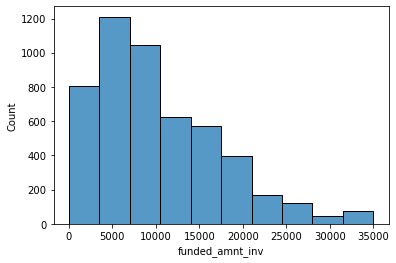

In [281]:
sns.histplot(data=loan_df_charged_off, x=loan_df_charged_off['funded_amnt_inv'], bins=10)

### Insights
- Funded amount Inv within the range of 5000 to 10000 seems to be more charged off than higher funded amount inv.

### Analysing the annual income of employees w.r.t home_ownership for charged off data set

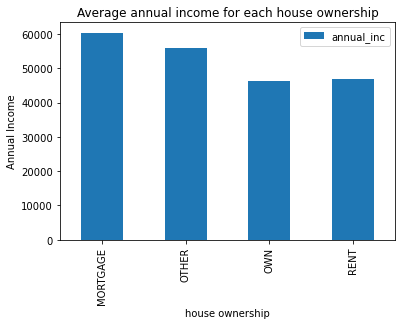

In [282]:
## Creating a pivot table having inde as home_ownership and the values as annual_inc
## Aggregated function mean has been applied
annualInc_homeOwnership_opivot = pd.pivot_table(data= loan_df_charged_off, index ='home_ownership', values='annual_inc', aggfunc='mean' )

annualInc_homeOwnership_opivot.plot.bar()
plt.ylabel("Annual Income")
plt.xlabel("house ownership")
plt.title("Average annual income for each house ownership")
plt.show()


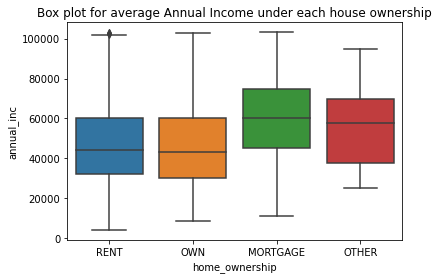

In [283]:
## PLotting box plot for home_ownership vs annual_inc
sns.boxplot(data=loan_df_charged_off, x="home_ownership", y="annual_inc")
plt.title("Box plot for average Annual Income under each house ownership" )
plt.show()

### <font color=blue> Insights </font>
- Customers having an average income of <b>60k</b> and having the house ownership as <b>mortgage</b> are more likely to be defaulters

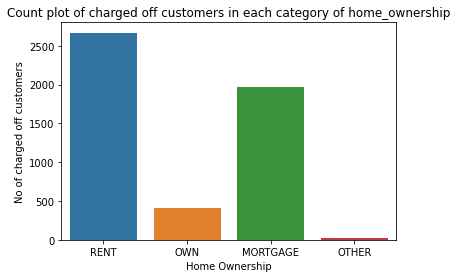

In [284]:
sns.countplot(data=loan_df_charged_off,x=loan_df_charged_off['home_ownership'])
plt.xlabel("Home Ownership")
plt.ylabel("No of charged off customers")
plt.title("Count plot of charged off customers in each category of home_ownership")
plt.show()

### Analysing interest rate

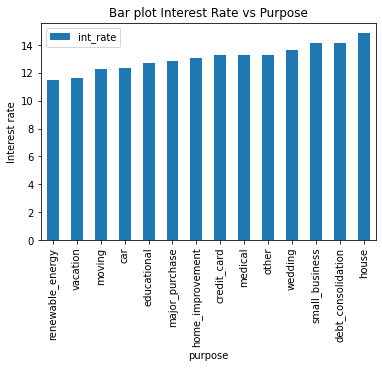

In [285]:

int_purpose_pivot = pd.pivot_table(data= loan_df_charged_off, index ='purpose', values='int_rate', aggfunc='mean' )
int_purpose_pivot.sort_values(by='int_rate').plot.bar()
plt.xlabel("purpose")
plt.ylabel('Interest rate')
plt.title("Bar plot Interest Rate vs Purpose")
plt.show()

### These below combinations of purpose with interest rate are more likely to charged Off
- house with avaerage of 14% interest rate 
- small business & debt_consolidation with average ~13% 


### loan_amount vs income

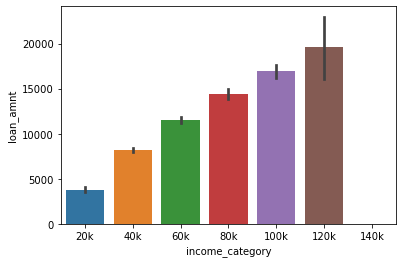

In [286]:
sns.barplot(data=loan_df_charged_off, x=loan_df_charged_off['income_category'], y=loan_df_charged_off['loan_amnt'])
plt.show()

### <font color=blue> Insights </font>
- Charged off customers having more annual income avail more loan

### Analysing purpose vs loan_status for charged off data

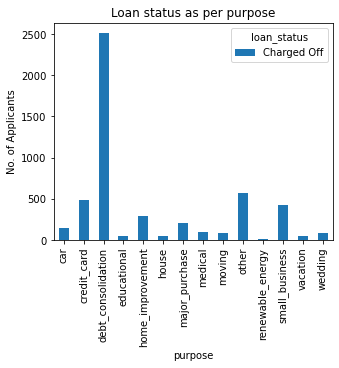

In [287]:

pd.crosstab(loan_df_charged_off['purpose'],loan_df_charged_off.loan_status).plot(kind="bar",figsize=(5,4))
plt.title(f'Loan status as per purpose')
plt.xlabel('purpose')
plt.ylabel('No. of Applicants')
plt.show()


### <font color=blue> Insights </font>
- Charged off customers are more for the loan purpose under <b>debt_consolidation</b>, <b>credit_card</b> and <b>other</b> category

### term_in_months vs loan_status

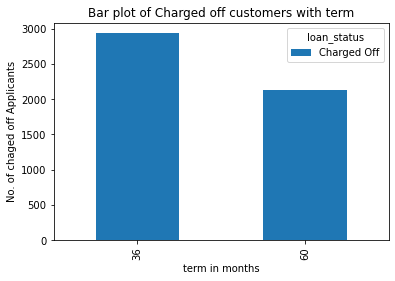

In [288]:

term_pivot = pd.pivot_table(data=loan_df_charged_off, index='term_in_months', columns = 'loan_status', aggfunc='count')['annual_inc']
term_pivot.plot.bar()
plt.xlabel("term in months")
plt.ylabel("No. of chaged off Applicants")
plt.title("Bar plot of Charged off customers with term")
plt.show()

### <font color=blue> Insights </font>
- loans availed for a higher tenure 60 months are likely to be more charged off


### Corelation of key variables

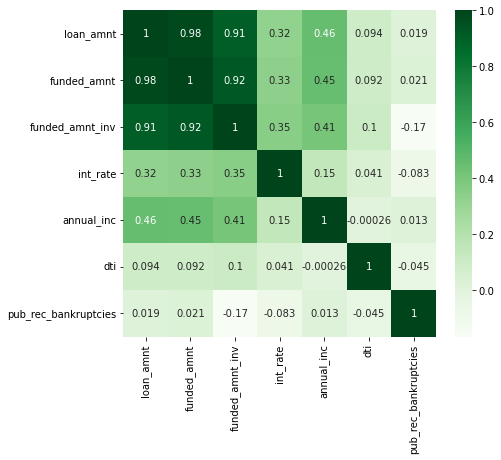

In [289]:
corr_list_of_fields = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','annual_inc','dti','pub_rec_bankruptcies']
corr_dataset = loan_df_charged_off.loc[:,corr_list_of_fields]

plt.figure(figsize=(7,6))
corr_data = corr_dataset.corr()
sns.heatmap(data=corr_data, cmap="Greens", annot=True)
plt.show()

### <font color=blue> Insights </font>
- loan amount, funded amount and funded amount inv are very strongly co-related
- DTI id negatively corelated to annual income. Employee having lower income have a high value of dti and vice-versa
- pub_rec_bankruptcies are -ve corelated to loan amount, funded amount and funded amount 


### emp_length vs loan_status

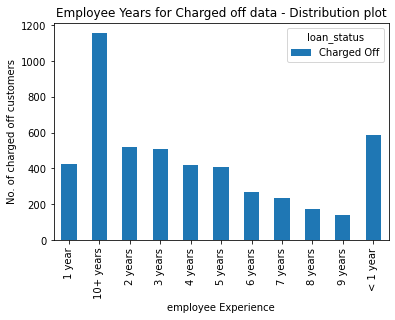

In [290]:
# emp_length dist plot

data1 = pd.pivot_table(data=loan_df_charged_off, index='emp_length', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar(stacked=True)

plt.xlabel('employee Experience')
plt.ylabel("No. of charged off customers")
plt.title('Employee Years for Charged off data - Distribution plot')
plt.show()

### <font color=blue> Insights </font>
- Customers having more than 10 years of experience are more likely to be charged off
- Also customers less than 1 year of experience goes towards the defaulters

### charged off customers per year

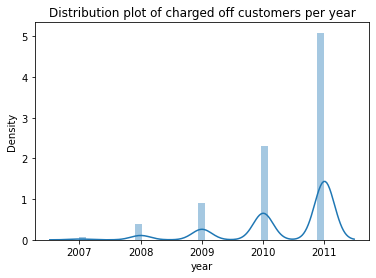

In [291]:
## Distribution plot

sns.distplot(loan_df_charged_off['year'])
plt.xlabel("year")
plt.title('Distribution plot of charged off customers per year')
plt.show()

### <font color=blue> Insights </font>
- Year 2011 seem to have more charged off, may be due to a downfall of economy

### Analysis of interest rate for charged off

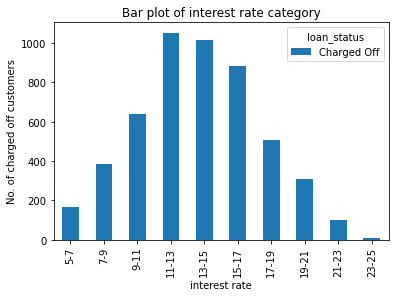

In [292]:
## create bins and labels for the interest rate
loan_df_charged_off['int_rate_category'] = pd.cut(x=loan_df_charged_off['int_rate'], bins=[5,7,9,11,13,15,17,19,21,23,25],
                     labels=['5-7','7-9','9-11','11-13','13-15','15-17','17-19','19-21','21-23','23-25'])

## Create pivot table 
data1 = pd.pivot_table(data=loan_df_charged_off, index='int_rate_category', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar()
plt.xlabel("interest rate")
plt.ylabel("No. of charged off customers")
plt.title("Bar plot of interest rate category")
plt.show()

### <font color=blue> Insights </font>
- Charged off are are seen more in the interest range of 11% - 15%

### Analysis of verification_status for charged off customers

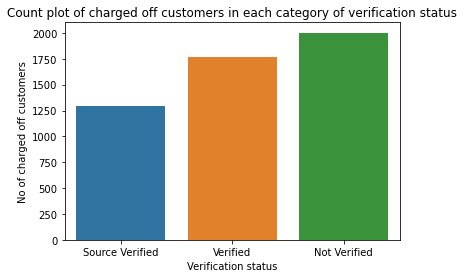

In [293]:
sns.countplot(data=loan_df_charged_off,x=loan_df_charged_off['verification_status'])
plt.xlabel("Verification status")
plt.ylabel("No of charged off customers")
plt.title("Count plot of charged off customers in each category of verification status")
plt.show()

### <font color=blue> Insights </font>
- Non verified customers are more falling under the category of defaulters

### Distribution of annual income for charged off customers

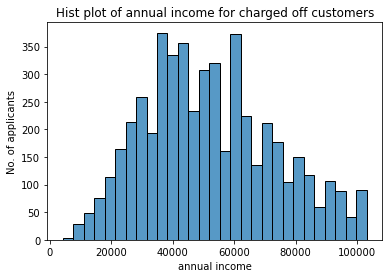

In [294]:
sns.histplot(loan_df_charged_off['annual_inc'])
plt.xlabel("annual income")
plt.ylabel("No. of applicants")
plt.title("Hist plot of annual income for charged off customers")
plt.show()

### <font color=blue> Insights </font>
- Annual income in the range of 40000 to 60000 are more likely to charged off

### Analysis of Grades for charged off customers

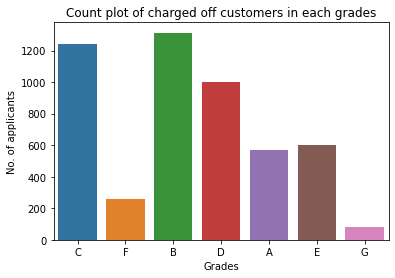

In [295]:
sns.countplot(data=loan_df_charged_off,x=loan_df_charged_off['grade'])
plt.xlabel('Grades')
plt.ylabel("No. of applicants")
plt.title("Count plot of charged off customers in each grades")
plt.show()

### <font color=blue> Insights </font>
- Charged off customers are high in B and C grades
- Will analyse more on this taking the percentage of charged off customers in each grade

### Sub_grade for charged off customers

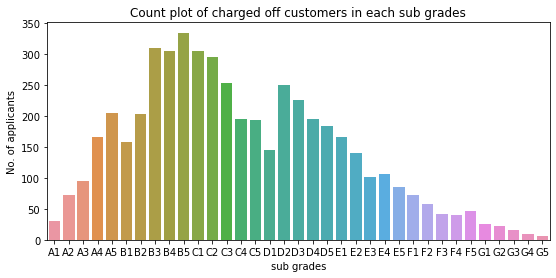

In [296]:
plt.figure(figsize=(9,4))
sns.countplot(data=loan_df_charged_off,x=loan_df_charged_off['sub_grade'].sort_values())
plt.xlabel("sub grades")
plt.ylabel("No. of applicants")
plt.title("Count plot of charged off customers in each sub grades")
plt.show()

### Creating a new column charged_flag
- assign 0 for fully paid
- assign 1 for charged off

In [297]:
loan_df_non_outliers['charged_flag'] = loan_df_non_outliers['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)
print(loan_df_non_outliers['charged_flag'].value_counts())

0    29279
1     5066
Name: charged_flag, dtype: int64


### Creating a pivot table 
- index - sub_grade`
- count - will calucualte the total number of records in each sub_grade
- sum - Get toatl number of charged off records(adding all the 1's)

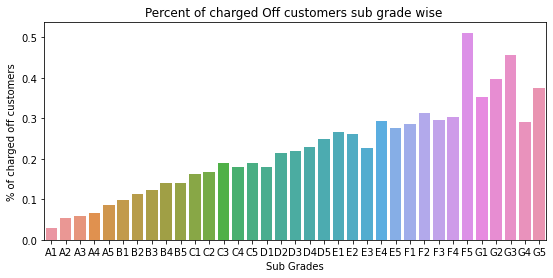

In [298]:
## Pivot table
sub_grade_data = pd.pivot_table(data=loan_df_non_outliers,index=loan_df_non_outliers['sub_grade'], values='charged_flag', aggfunc=('count','sum'))

plt.figure(figsize=(9,4))
sns.barplot(data=sub_grade_data, x=sub_grade_data.index, y=sub_grade_data['sum']/sub_grade_data['count'])
plt.xlabel("Sub Grades")
plt.ylabel("% of charged off customers")
plt.title("Percent of charged Off customers sub grade wise ")
plt.show()

### <font color=blue> Insights </font>
- Sub Grade F5 is seen to have more charged off customers and A1 being the least
- Frequency of charged off is incresing when moving from sub grades A to G

### Creating a pivot table 
- index - sub_grade
- count - will calucualte the total number of records in each grade
- sum - Get toatl number of charged off records(adding all the 1's)

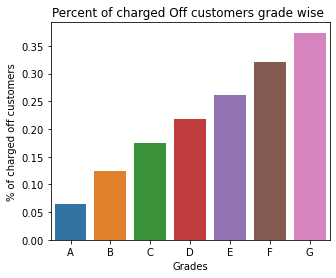

In [299]:
#pivot table
grade_data = pd.pivot_table(data=loan_df_non_outliers,index=loan_df_non_outliers['grade'], values='charged_flag', aggfunc=('count','sum'))


plt.figure(figsize=(5,4))
sns.barplot(data=grade_data, x=grade_data.index, y=grade_data['sum']/grade_data['count'])
plt.xlabel("Grades")
plt.ylabel("% of charged off customers")
plt.title("Percent of charged Off customers grade wise ")
plt.show()

### <font color=blue> Insights </font>
- Grade G is seen to have more charged off customers and A being the least

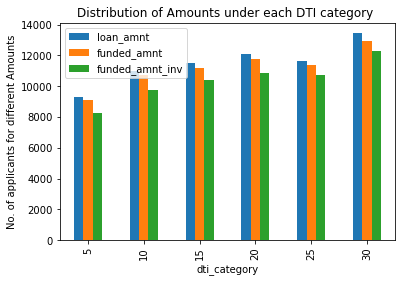

In [300]:
## Create bins
dti_bins = [0,5,10,15,20,25,30,35]
dti_labels = ['5','10','15','20','25','30', '35']

## storing the categorised dti value in the new column - dti_category
loan_df_charged_off['dti_category'] = pd.cut(x=loan_df_charged_off['dti'], bins=dti_bins,labels=dti_labels)


dti_pivot = pd.pivot_table(data=loan_df_charged_off, index='dti_category',values=['funded_amnt','funded_amnt_inv', 'loan_amnt'], aggfunc="mean")

dti_pivot['dti_category'] = dti_pivot.index
dti_pivot[['dti_category','loan_amnt','funded_amnt','funded_amnt_inv']].plot(x='dti_category', kind="bar")
plt.ylabel('No. of applicants for different Amounts')
plt.title('Distribution of Amounts under each DTI category ')
plt.show()


### <font color=blue> Insights </font>
- customers having more debt to income ratio are seen to be applying for more loan amount
- Higher loan amount corresponds to higher charged off
- Higher the dti more the charged off

------ dti_category vs loan_status ------ 


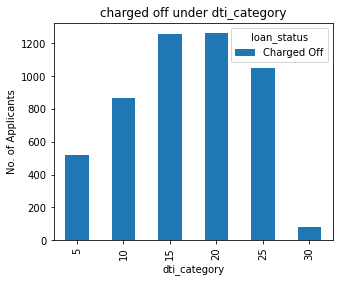

In [301]:

## Create bins
dti_bins = [0,5,10,15,20,25,30,35]
dti_labels = ['5','10','15','20','25','30','35']
loan_df_charged_off['dti_category'] = pd.cut(x=loan_df_charged_off['dti'], bins=dti_bins,labels=dti_labels)

column_name = 'dti_category'
print(f"------ {column_name} vs loan_status ------ ")
pd.crosstab(loan_df_charged_off[column_name],loan_df_charged_off.loan_status).plot(kind="bar",figsize=(5,4))
plt.title(f'charged off under {column_name}')
plt.xlabel(column_name)
plt.ylabel('No. of Applicants')
plt.show()

### <font color=blue> Insights </font>
- dti in the range of 10  to 20 have the most defaulters

In [302]:
### Analysis of address state for charged off customers

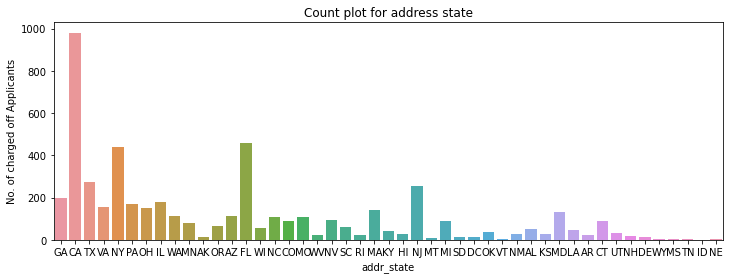

In [303]:
# Plotting a count plot    
plt.figure(figsize = (12,4))
sns.countplot(data=loan_df_charged_off,x=loan_df_charged_off['addr_state'])
plt.xlabel('addr_state')
plt.ylabel("No. of charged off Applicants")
plt.title(f"Count plot for address state")
plt.show()

### <font color=blue> Insights </font>
- Customers from state CA seems to be more as defaulters
- We can check this value before providing loan

### Key variables acting as Driving factors for loan_status

1. annual_inc
2. verification_status
3. funded_amnt_inv
4. dti
5. int_rate
6. grade
7. sub_grade
8. emp_length
9. home_ownership
10. issue_d
11. purpose 
12. pub_rec_bankruptcies



# <font color=blue> Summary Insights </font> 

1. Customers holding the <b>salary</b> range within <b>40k</b> to <b>60k</b> are more likely to be charged off
2. <b>Non verified</b> customers are observed to be charging off more
3. <b>Funded amount Inv</b> within the range of <b>5000</b> to <b>10000</b> seems to be more charged off than higher funded amount inv.
4. Customers having more <b>debt to income ratio</b> are seen to be applying for more loan amount, resulting in higher loan amount corresponds to higher charged off
5. Loans with the interest rate in the range of <b>11-15%</b> are likely to be more charged off
6. Charged off customers are more for the loan purpose under <b>debt_consolidation, credit_card and other category</b>
7. On analyzing grades with charged off frequency Grade B is observed to be most charged off segment. However on further analysis on sub grade having % of accounts being charged off <b>Grade G</b> looks to be on higher side
8. Customers having more than <b>10+ years of experience</b> seem to be more charged off. In addition the <b>customers less than 1 year of experience </b> falls under defaulters
9. Customers ownership as <b>Mortgage</b> or <b>Rent</b> likely to be charged Off
10. Chances of defaulters increase in a stresed economy as we observed in <b>later half of year 2011</b>
11. Charged off customers are more for the loan purpose under <b>debt_consolidation</b> and <b>credit_card</b> category
12. pub_rec_bankruptcies having value as 0 are observed to be more charged off however looking at the % of applicants values <b>1 and 2</b> are charged off more.
13. Customers from state CA are more in defaulters